# Empirical Estimation of Confidence Intervals for Machine Learning
This notebook presents the usage of python functions to perform empirical
estimation of confidence intervals for machine learning models. This kind of confidence interval estimation is often
called "Bootstrap Confidence Interval" or "Monte Carlo Confidence Interval" estimation.

In [1]:
import numpy as np
from tqdm.auto import tqdm

In [2]:
%%capture

from keras.models import Sequential
from keras.layers import Dense

In [3]:
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
from bootstrap_confindence_intervals import get_accuracy_on_samples, get_confidence_interval, plot_confidence

# Basic Usage
The basic usage of the functions is presented by computing different confidence intervals for a random-forest classifier over the iris dataset.

In [5]:
# Data loading and presentation

iris_dataset = load_iris()
iris_X, iris_y = iris_dataset['data'], iris_dataset['target']

In [6]:
[(a, b) for (a, b) in zip(iris_X, iris_y)][:5]

[(array([5.1, 3.5, 1.4, 0.2]), 0),
 (array([4.9, 3. , 1.4, 0.2]), 0),
 (array([4.7, 3.2, 1.3, 0.2]), 0),
 (array([4.6, 3.1, 1.5, 0.2]), 0),
 (array([5. , 3.6, 1.4, 0.2]), 0)]

In [7]:
[(a, b) for (a, b) in zip(iris_X, iris_y)][-5:]

[(array([6.7, 3. , 5.2, 2.3]), 2),
 (array([6.3, 2.5, 5. , 1.9]), 2),
 (array([6.5, 3. , 5.2, 2. ]), 2),
 (array([6.2, 3.4, 5.4, 2.3]), 2),
 (array([5.9, 3. , 5.1, 1.8]), 2)]

In [8]:
# These parameters will be passed to the constructor of RandomForestClassifier for the creation of each new instance

rfc_params_dict = {"n_estimators":20, "max_depth":3}

In [9]:
# The accuracy of a random-forest classifier is evaluated on 100 samples of the iris dataset. Each sample is sampled
# with replacement from the original dataset.

accs=get_accuracy_on_samples(RandomForestClassifier, iris_X, iris_y,
                             model_params_dict=rfc_params_dict,
                             n_iterations=100, sample_ratio=0.7,
                             train_ratio=0.8, random_seed=None,
                             sample_with_replacement=True, verbose=True)

Evaluating model on 100 samples of (X, y).
Each sample will contain 105 elements from (X, y), out of which 84 elements
will be used to train the model, while the remaining 21 elements to test its accuracy.


In [10]:
[(k, accs[k]) for k in range(5)]

[(0, 1.0),
 (1, 0.9523809523809523),
 (2, 1.0),
 (3, 0.9047619047619048),
 (4, 0.9523809523809523)]

In [11]:
# Confidence intervals are estimated from the performance of the models in the 100 evaluations.

get_confidence_interval(accs, 10)

From the given data, with 90% probability the accuracy of the model is 95.24% +/-4.76.


{'lower_bound': 0.9047619047619048, 'median': 1.0, 'upper_bound': 1.0}

In [12]:
get_confidence_interval(accs, 5)

From the given data, with 95% probability the accuracy of the model is 95.24% +/-4.76.


{'lower_bound': 0.9047619047619048, 'median': 1.0, 'upper_bound': 1.0}

In [13]:
get_confidence_interval(accs, 1)

From the given data, with 99% probability the accuracy of the model is 92.86% +/-7.14.


{'lower_bound': 0.8571428571428571, 'median': 1.0, 'upper_bound': 1.0}

# Neural Networks and One-Hot-Encoding
The following example shows how to use the functions with simple neural networks and one hot encoding of labels.

In [14]:
%%capture
iris_y_onehot = OneHotEncoder().fit_transform(iris_y.reshape(-1, 1)).toarray()

In [15]:
iris_y_onehot[:5], iris_y_onehot[-5:]

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]), array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]))

In [16]:
# The following function will return instances of the model

def get_model(hidden_units,  n_output_units, hidden_activation="relu",
              output_activation="softmax", loss="binary_crossentropy",
              optimizer="adam", metric="accuracy"):
    model = Sequential()
    
    for u in hidden_units:
        model.add(Dense(u, activation=hidden_activation))
    model.add(Dense(n_output_units, activation=output_activation))
    
    model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
    return model

In [17]:
model = get_model(hidden_units=[30, 20, 10],  n_output_units=3)

In [18]:
model.fit(iris_X, iris_y_onehot, epochs = 8, verbose=1, batch_size=10)

W1231 02:07:49.825320 139628666992448 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1231 02:07:51.404954 139628666992448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/8
150/150 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6689
Epoch 2/8
150/150 [==============================] - 0s 267us/step - loss: 0.6134 - accuracy: 0.7222
Epoch 3/8
150/150 [==============================] - 0s 256us/step - loss: 0.5934 - accuracy: 0.6933
Epoch 4/8
150/150 [==============================] - 0s 260us/step - loss: 0.5789 - accuracy: 0.7578
Epoch 5/8
150/150 [==============================] - 0s 253us/step - loss: 0.5647 - accuracy: 0.7578
Epoch 6/8
150/150 [==============================] - 0s 248us/step - loss: 0.5498 - accuracy: 0.7689
Epoch 7/8
150/150 [==============================] - 0s 260us/step - loss: 0.5380 - accuracy: 0.7467
Epoch 8/8
150/150 [==============================] - 0s 255us/step - loss: 0.5281 - accuracy: 0.7578


In [19]:
model.predict(iris_X[:5])

array([[0.3251308 , 0.4254945 , 0.24937472],
       [0.32434875, 0.4273623 , 0.24828899],
       [0.32764924, 0.41847566, 0.2538751 ],
       [0.3285712 , 0.41601464, 0.25541416],
       [0.32688448, 0.42080313, 0.25231245]], dtype=float32)

In [20]:
dnn_params_dict = {'hidden_units':[30, 20, 10], 'hidden_activation':"relu", 'n_output_units':3,
                   'output_activation':"softmax", 'loss':'binary_crossentropy', 'optimizer':'adam'}

# These parameters will be passed to the network on the calls of the fit method.
dnn_fit_params_dict={'epochs':50, 'batch_size':10, 'verbose':0}

In [21]:
accs=get_accuracy_on_samples(get_model, iris_X, iris_y_onehot, model_params_dict=dnn_params_dict,
                            fit_params_dict=dnn_fit_params_dict, n_iterations=20, sample_ratio=0.7,
                            train_ratio=0.8, random_seed=None, sample_with_replacement=True,
                             verbose=True, is_one_hot=True)

Evaluating model on 20 samples of (X, y).
Each sample will contain 105 elements from (X, y), out of which 84 elements
will be used to train the model, while the remaining 21 elements to test its accuracy.


In [22]:
get_confidence_interval(accs, 10)

From the given data, with 90% probability the accuracy of the model is 97.62% +/-2.38.


{'lower_bound': 0.9523809523809523, 'median': 1.0, 'upper_bound': 1.0}

In [23]:
get_confidence_interval(accs, 5)

From the given data, with 95% probability the accuracy of the model is 97.62% +/-2.38.


{'lower_bound': 0.9523809523809523, 'median': 1.0, 'upper_bound': 1.0}

In [24]:
get_confidence_interval(accs, 1)

From the given data, with 99% probability the accuracy of the model is 97.62% +/-2.38.


{'lower_bound': 0.9523809523809523, 'median': 1.0, 'upper_bound': 1.0}

# Plotting Confidence Intervals
The following example shows how to plot confidence intervals.  

In [25]:
# Data loading and presentation

cancer_dataset = load_breast_cancer()
cancer_X, cancer_y = cancer_dataset['data'], cancer_dataset['target']
[(a[:5], b) for (a, b) in zip(cancer_X, cancer_y)][:2]

[(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01]), 0),
 (array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02]), 0)]

In [26]:
[(a[:5], b) for (a, b) in zip(cancer_X, cancer_y)][-2:]

[(array([2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01]), 0),
 (array([7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]), 1)]

In [27]:
neigbhors= [1, 3, 5, 7, 10, 15, 20, 50, 100, 200]
nn_params_dict = {"n_neighbors":None}

In [28]:
# As an example we will test different hyperparameters for KNN classifiers.

confidence = {90:[], 95:[], 99:[]}
for k in tqdm(neigbhors):
    nn_params_dict["n_neighbors"]=k
    accs=get_accuracy_on_samples(KNeighborsClassifier, cancer_X, cancer_y,
                             model_params_dict=nn_params_dict,
                             n_iterations=100, sample_ratio=0.7,
                             train_ratio=0.7, random_seed=42,
                             sample_with_replacement=True,
                             verbose=False, progress_bar=False)
    
    confidence[90].append(get_confidence_interval(accs, 10, verbose=False))
    confidence[95].append(get_confidence_interval(accs, 5, verbose=False))
    confidence[99].append(get_confidence_interval(accs, 1, verbose=False))

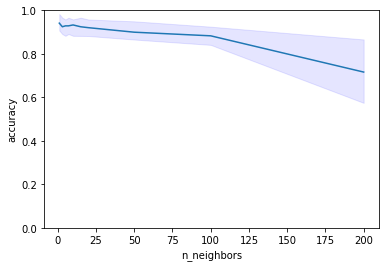

In [29]:
lower_bounds = [c["lower_bound"] for c in confidence[90]]
median = [c["median"] for c in confidence[90]]
upper_bounds = [c["upper_bound"] for c in confidence[90]]

plot_confidence(lower_bounds, median, upper_bounds,
                    x_axis=neigbhors, xlabel="n_neighbors", y_bottom=0,
                    y_top=1, color='b', ylabel="accuracy")

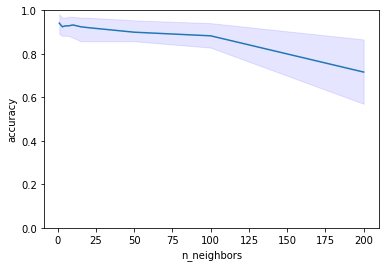

In [30]:
lower_bounds = [c["lower_bound"] for c in confidence[95]]
median = [c["median"] for c in confidence[95]]
upper_bounds = [c["upper_bound"] for c in confidence[95]]

plot_confidence(lower_bounds, median, upper_bounds,
                    x_axis=neigbhors, xlabel="n_neighbors", y_bottom=0,
                    y_top=1, color='b', ylabel="accuracy")

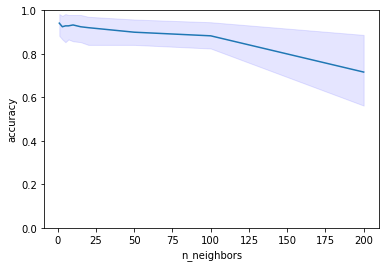

In [31]:
lower_bounds = [c["lower_bound"] for c in confidence[99]]
median = [c["median"] for c in confidence[99]]
upper_bounds = [c["upper_bound"] for c in confidence[99]]

plot_confidence(lower_bounds, median, upper_bounds,
                    x_axis=neigbhors, xlabel="n_neighbors", y_bottom=0,
                    y_top=1, color='b', ylabel="accuracy")

# Deterministic Resampling
The following example shows the usage of the $\texttt{random_seed}$ parameter.

In [32]:
# Here the random_seed param is set.

accs_run_1=get_accuracy_on_samples(GaussianNB, cancer_X, cancer_y,
                             n_iterations=100, sample_ratio=0.7,
                             train_ratio=0.8, random_seed=42,
                             sample_with_replacement=True, verbose=True)

Evaluating model on 100 samples of (X, y).
Each sample will contain 398 elements from (X, y), out of which 318 elements
will be used to train the model, while the remaining 80 elements to test its accuracy.


In [33]:
[(k, accs_run_1[k]) for k in range(6)]

[(0, 0.95), (1, 0.9), (2, 0.8875), (3, 0.9625), (4, 0.9625), (5, 0.8625)]

In [34]:
get_confidence_interval(accs_run_1, 5)

From the given data, with 95% probability the accuracy of the model is 93.42% +/-5.33.


{'lower_bound': 0.8809374999999999, 'median': 0.9375, 'upper_bound': 0.9875}

In [35]:
accs_run_2=get_accuracy_on_samples(GaussianNB, cancer_X, cancer_y,
                             n_iterations=100, sample_ratio=0.7,
                             train_ratio=0.8, random_seed=42,
                             sample_with_replacement=True, verbose=True)

Evaluating model on 100 samples of (X, y).
Each sample will contain 398 elements from (X, y), out of which 318 elements
will be used to train the model, while the remaining 80 elements to test its accuracy.


In [36]:
# As you can see, the results are identical to the previous run of the function. Be aware that the results
# also depend on the model's characteristic. As an example, if the random seed is set, but the model has 
# some sort of random initialization (i.e. Neural Networks), you may see different results although the
# resampling of the data was identical.

[(k, accs_run_2[k]) for k in range(6)]

[(0, 0.95), (1, 0.9), (2, 0.8875), (3, 0.9625), (4, 0.9625), (5, 0.8625)]

In [37]:
get_confidence_interval(accs_run_2, 5)

From the given data, with 95% probability the accuracy of the model is 93.42% +/-5.33.


{'lower_bound': 0.8809374999999999, 'median': 0.9375, 'upper_bound': 0.9875}

In [38]:
# Here the random_seed param is set to None

accs_run_3=get_accuracy_on_samples(GaussianNB, cancer_X, cancer_y,
                             n_iterations=100, sample_ratio=0.7,
                             train_ratio=0.8, random_seed=None,
                             sample_with_replacement=True, verbose=True)

Evaluating model on 100 samples of (X, y).
Each sample will contain 398 elements from (X, y), out of which 318 elements
will be used to train the model, while the remaining 80 elements to test its accuracy.


In [39]:
[(k, accs_run_3[k]) for k in range(6)]

[(0, 0.9125), (1, 0.95), (2, 0.95), (3, 0.9), (4, 0.975), (5, 0.95)]

In [40]:
get_confidence_interval(accs_run_3, 5)

From the given data, with 95% probability the accuracy of the model is 93.12% +/-5.63.


{'lower_bound': 0.875, 'median': 0.9375, 'upper_bound': 0.9875}

In [41]:
accs_run_4=get_accuracy_on_samples(GaussianNB, cancer_X, cancer_y,
                             n_iterations=100, sample_ratio=0.7,
                             train_ratio=0.8, random_seed=None,
                             sample_with_replacement=True, verbose=True)

Evaluating model on 100 samples of (X, y).
Each sample will contain 398 elements from (X, y), out of which 318 elements
will be used to train the model, while the remaining 80 elements to test its accuracy.


In [42]:
[(k, accs_run_4[k]) for k in range(6)]

[(0, 0.975), (1, 0.975), (2, 0.9625), (3, 0.925), (4, 0.95), (5, 1.0)]

In [43]:
get_confidence_interval(accs_run_4, 5)

From the given data, with 95% probability the accuracy of the model is 93.75% +/-5.66.


{'lower_bound': 0.8809374999999999,
 'median': 0.95,
 'upper_bound': 0.9940624999999998}